# 5.11 专题：k-means聚类

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

## 5.11.1 k-means简介

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

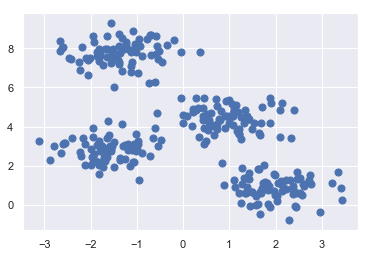

In [4]:
plt.scatter(x[:, 0], x[:, 1], s=50)

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=4)

In [7]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
y_kmeans = kmeans.predict(x)

In [9]:
y_kmeans

array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
       3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
       3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
       2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
       1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
       2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2,
       1, 3, 0, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 3])

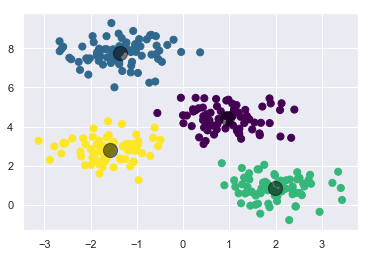

In [12]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

k-means方法使用了一种容易理解、便于重复的期望最大化算法取代了穷举搜索。

## 5.11.2 k-means算法：期望最大化

非常基础的k-means算法实现。

In [13]:
from sklearn.metrics import pairwise_distances_argmin

In [14]:
def find_clusters(x, n_clusters, rseed=2):
    # 1. 随机选取簇中心点
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    
    while True:
        # 2a. 基于最近的中心指定标签
        labels = pairwise_distances_argmin(x, centers)
        # 2b. 根据点的平均值找到新的中心
        new_centers = np.array([x[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. 确认收敛
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

In [15]:
centers, labels = find_clusters(x, 4)

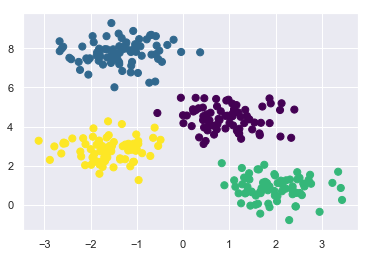

In [16]:
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

- 可能不会达到全局最优的结果

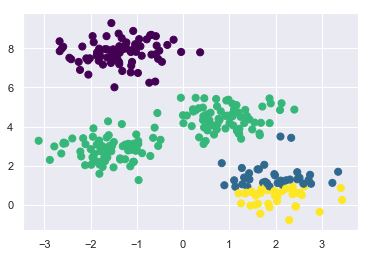

In [17]:
centers, labels = find_clusters(x, 4, rseed=0)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

- 簇数量必须事先定好

In [18]:
labels = KMeans(6, random_state=0).fit_predict(x)

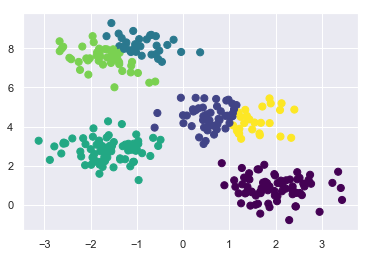

In [19]:
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

- k-means算法只能确定线性聚类边界

In [20]:
from sklearn.datasets import make_moons

In [21]:
x, y = make_moons(200, noise=0.05, random_state=0)

In [22]:
labels = KMeans(2, random_state=0).fit_predict(x)

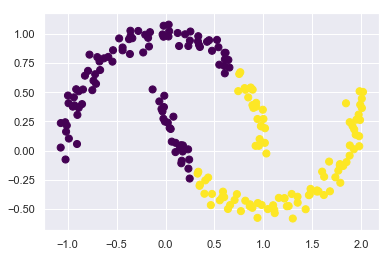

In [23]:
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

通过一个核变换将数据投影到更高维的空间，投影后的数据使线性分离称为可能。

用最近邻图来计算数据的高维表示，然后用k-means算法分配标签

In [24]:
from sklearn.cluster import SpectralClustering

In [25]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

In [26]:
labels = model.fit_predict(x)

d:\python35\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


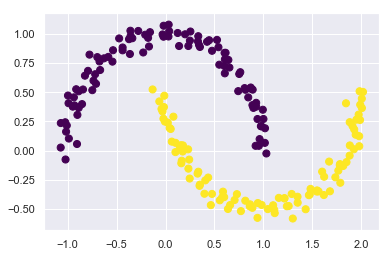

In [27]:
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

通过核变换方法，核k-means就能够找到簇之间复杂的非线性边界了。

- 当数据量较大时，k-means会很慢

放宽“每次迭代都必须使用所有数据点”的条件，每一步仅使用数据集的一个自己来更新簇中心点。

In [28]:
from sklearn.cluster import MiniBatchKMeans

## 5.11.3 案例

1. 案例1：用k-means算法处理手写数字

In [29]:
from sklearn.datasets import load_digits

In [30]:
digits = load_digits()

In [31]:
digits.data.shape

(1797, 64)

In [32]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [33]:
clusters = kmeans.fit_predict(digits.data)

In [34]:
kmeans.cluster_centers_.shape

(10, 64)

簇中心点

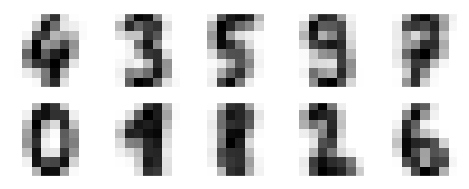

In [36]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [37]:
from scipy.stats import mode

In [38]:
labels = np.zeros_like(clusters)

In [40]:
labels.shape

(1797,)

In [41]:
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
labels

array([0, 8, 8, ..., 8, 9, 9])

In [44]:
accuracy_score(digits.target, labels)

0.7935447968836951

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
mat = confusion_matrix(digits.target, labels)

Text(123.75,0.5,'predicted label')

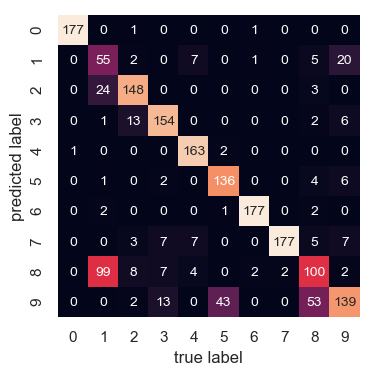

In [49]:
plt.figure(dpi=100)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

使用t-分布领域嵌入算法在执行k-means之前对数据进行预处理

In [50]:
from sklearn.manifold import TSNE

In [51]:
# 投影数据：这一步将耽误几秒钟
tsne = TSNE(n_components=2, init='pca', random_state=0)

In [52]:
digits_proj = tsne.fit_transform(digits.data)

In [53]:
# 计算类
kmeans = KMeans(n_clusters=10, random_state=0)

In [54]:
clusters = kmeans.fit_predict(digits_proj)

In [55]:
# 排列标签
labels = np.zeros_like(clusters)

In [56]:
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [57]:
# 计算准确度
accuracy_score(digits.target, labels)

0.9398998330550918

In [59]:
mode?

Signature: mode(a, axis=0, nan_policy='propagate')
Docstring:
Return an array of the modal (most common) value in the passed array.

If there is more than one such value, only the smallest is returned.
The bin-count for the modal bins is also returned.

Parameters
----------
a : array_like
    n-dimensional array of which to find mode(s).
axis : int or None, optional
    Axis along which to operate. Default is 0. If None, compute over
    the whole array `a`.
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan. 'propagate' returns nan,
    'raise' throws an error, 'omit' performs the calculations ignoring nan
    values. Default is 'propagate'.

Returns
-------
mode : ndarray
    Array of modal values.
count : ndarray
    Array of counts for each mode.

Examples
--------
>>> a = np.array([[6, 8, 3, 0],
...               [3, 2, 1, 7],
...               [8, 1, 8, 4],
...               [5, 3, 0, 5],
...               [4, 7, 5, 9]])
>>> f

2. 案例2：将k-means用于色彩压缩

In [60]:
from sklearn.datasets import load_sample_image

In [61]:
china = load_sample_image("china.jpg")

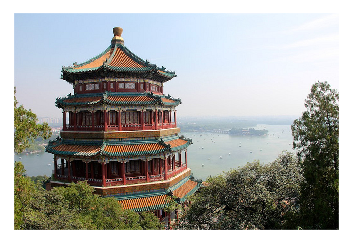

In [62]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [64]:
china.shape

(427, 640, 3)

In [65]:
data = china / 255.0

In [66]:
data = data.reshape(427*640, 3)

In [67]:
data.shape

(273280, 3)

In [74]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # 随机选择一个子集
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20)

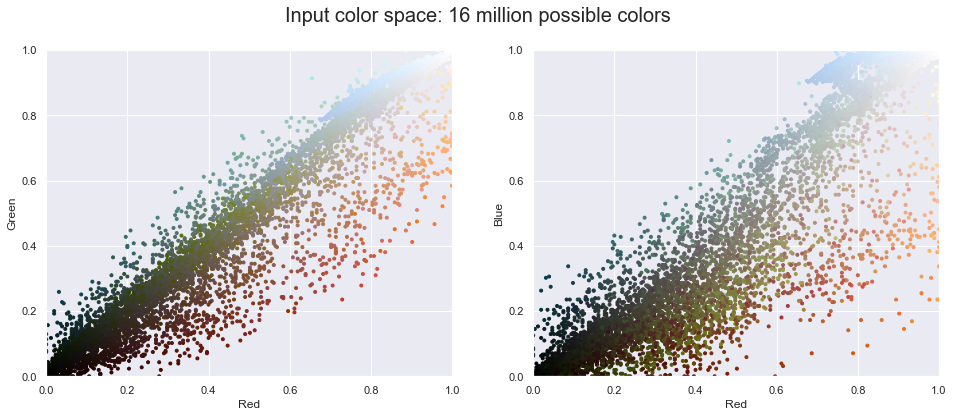

In [75]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [76]:
from sklearn.cluster import MiniBatchKMeans

In [77]:
kmeans = MiniBatchKMeans(16)

In [78]:
kmeans.fit(data)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=16, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [79]:
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

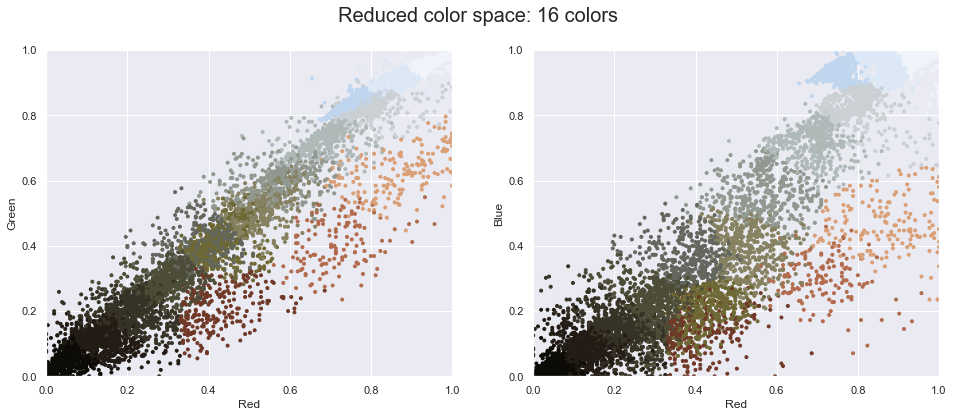

In [81]:
plot_pixels(data, colors=new_colors, title='Reduced color space: 16 colors')

In [82]:
new_colors

array([[0.75219443, 0.83836812, 0.93648836],
       [0.75219443, 0.83836812, 0.93648836],
       [0.75219443, 0.83836812, 0.93648836],
       ...,
       [0.21059776, 0.19705255, 0.14720734],
       [0.04683714, 0.04508815, 0.02337173],
       [0.04683714, 0.04508815, 0.02337173]])

In [83]:
kmeans.predict(data)

array([ 0,  0,  0, ...,  1, 13, 13])

In [85]:
kmeans.cluster_centers_

array([[0.75219443, 0.83836812, 0.93648836],
       [0.21059776, 0.19705255, 0.14720734],
       [0.52646317, 0.50749024, 0.37668319],
       [0.94534161, 0.96046326, 0.98500169],
       [0.56614438, 0.59713583, 0.56435243],
       [0.43127231, 0.41200418, 0.20519875],
       [0.13690106, 0.11068566, 0.08108495],
       [0.79597437, 0.81668911, 0.83113699],
       [0.29799066, 0.29661916, 0.21540672],
       [0.68706065, 0.72828351, 0.72005517],
       [0.4375658 , 0.2215121 , 0.1478608 ],
       [0.85662547, 0.6243227 , 0.45916587],
       [0.38373218, 0.40117035, 0.36481887],
       [0.04683714, 0.04508815, 0.02337173],
       [0.86249417, 0.91063572, 0.96395927],
       [0.70211331, 0.41795064, 0.3030695 ]])

In [84]:
new_colors.shape

(273280, 3)

用计算的结果对原始像素重新着色

In [86]:
china_recolored = new_colors.reshape(china.shape)

Text(0.5,1,'16-color Image')

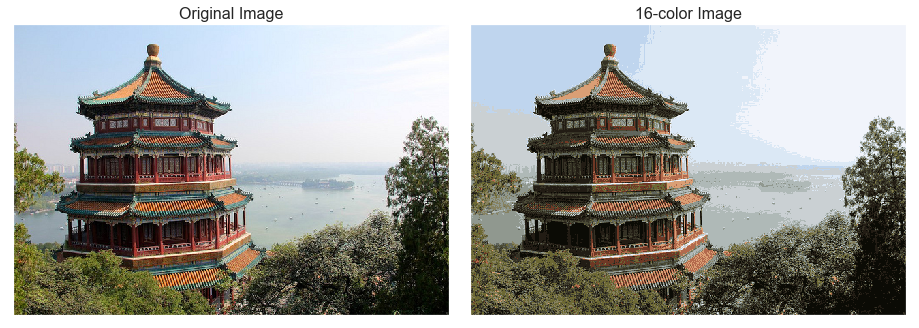

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)